In [2]:
!pip3 install -r ./requirements.txt > pip-log.txt

You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from google.cloud import storage
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import os

%load_ext google.cloud.bigquery

In [5]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'homework4-key.json'

In [127]:
%%bigquery cms_df

select * from `bigquery-public-data.cms_medicare.nursing_facilities_2014`;


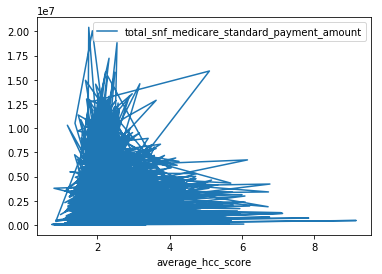

In [128]:
cms_df.plot(kind='line',x='average_hcc_score', y='total_snf_medicare_standard_payment_amount')

In [129]:
state_wise = cms_df.groupby(['state']).mean()

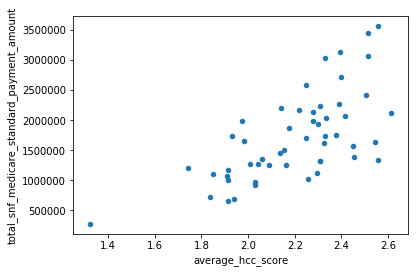

In [130]:
state_wise.plot(kind='scatter',x='average_hcc_score', y='total_snf_medicare_standard_payment_amount')

In [131]:
state_wise.sort_values(by=['average_hcc_score'])

,zip_code,total_stays,distinct_beneficiaries_per_provider,average_length_of_stays_days,total_snf_charge_amount,total_snf_medicare_allowed_amount,total_snf_medicare_payment_amount,total_snf_medicare_standard_payment_amount,average_age,male_beneficiaries,...,percent_of_beneficiaries_with_copd,percent_of_beneficiaries_with_depression,percent_of_beneficiaries_with_diabetes,percent_of_beneficiaries_with_hyperlipidemia,percent_of_beneficiaries_with_hypertension,percent_of_beneficiaries_with_ihd,percent_of_beneficiaries_with_osteoporosis,percent_of_beneficiaries_with_ra_oa,percent_of_beneficiaries_with_schizophrenia,percent_of_beneficiaries_with_stroke
state,,,,,,,,,,,,,,,,,,,,,
PR,757.600000,57.200000,55.400000,12.420000,4.022348e+05,1.763414e+05,1.580774e+05,2.748770e+05,74.600000,31.000000,...,12.600000,20.600000,58.600000,55.000000,NaN,42.600000,14.600000,62.250000,2.600000,15.600000
WY,82483.241379,112.931034,92.689655,28.555172,2.146640e+06,1.443318e+06,1.155354e+06,1.204031e+06,79.724138,40.230769,...,37.758621,45.862069,39.379310,45.827586,73.000000,45.689655,17.482759,44.103448,15.517241,11.896552
SD,57295.393939,76.707071,63.010101,27.832323,1.146103e+06,8.065087e+05,6.310217e+05,7.300838e+05,82.020202,30.219178,...,33.353535,46.040404,37.181818,56.298969,68.000000,48.242424,21.060606,49.354167,20.939394,11.767677
MT,59540.590164,113.426230,96.245902,26.078689,1.856927e+06,1.237843e+06,1.003520e+06,1.096935e+06,78.885246,48.270833,...,36.721311,45.327869,38.196721,51.416667,66.333333,43.508197,20.393443,48.500000,14.114754,13.590164
MN,55812.730114,124.258523,102.639205,23.429261,1.607826e+06,1.284840e+06,1.099264e+06,1.073000e+06,79.926136,48.735915,...,25.866477,41.899713,36.025568,59.129794,71.466667,45.908832,19.235795,46.879656,17.079772,12.241477
NE,68609.761658,99.124352,81.196891,28.475130,1.736334e+06,1.160245e+06,9.384336e+05,1.003765e+06,80.678756,39.693431,...,34.352332,46.442708,38.812500,55.360215,70.166667,51.952128,19.191710,54.408602,19.689119,13.839378
HI,96784.514286,98.171429,87.942857,27.965714,2.304143e+06,1.558003e+06,1.336461e+06,1.166735e+06,82.057143,45.137931,...,22.142857,27.742857,44.628571,65.857143,NaN,50.942857,32.542857,40.142857,6.314286,24.228571
IA,51231.238329,73.056511,58.879607,24.713759,1.066702e+06,7.317419e+05,5.943890e+05,6.615664e+05,81.550369,30.243028,...,32.211302,42.490099,38.936118,57.303109,70.888889,49.298246,18.176904,51.408629,17.031941,13.402948
VT,5511.694444,159.222222,127.222222,27.541667,2.652698e+06,2.085702e+06,1.715886e+06,1.730945e+06,80.638889,56.806452,...,33.388889,48.852941,38.555556,54.888889,70.666667,52.500000,17.555556,50.685714,13.611111,13.833333


In [30]:
%%bigquery hospitals_df
select hospital_name, hospital_type, hospital_ownership, hospital_overall_rating, facility_name, nf.state,  total_snf_charge_amount, total_snf_medicare_standard_payment_amount, avg(average_length_of_stays_days) as average_length_of_stays_days
, avg(percent_of_beneficiaries_with_atrial_fibrillation) as avg_percent_of_beneficiaries_with_atrial_fibrillation, avg(percent_of_beneficiaries_with_alzheimers) as avg_percent_of_beneficiaries_with_alzheimers, avg(percent_of_beneficiaries_with_asthma) as avg_percent_of_beneficiaries_with_asthma, avg( percent_of_beneficiaries_with_cancer) as avg_percent_of_beneficiaries_with_cancer, avg( percent_of_beneficiaries_with_chf) as avg_percent_of_beneficiaries_with_chf, avg( percent_of_beneficiaries_with_chronic_kidney_disease) as avg_percent_of_beneficiaries_with_chronic_kidney_disease, avg( percent_of_beneficiaries_with_copd) as avg_percent_of_beneficiaries_with_copd, avg( percent_of_beneficiaries_with_depression) as avg_percent_of_beneficiaries_with_depression, avg( percent_of_beneficiaries_with_diabetes) as avg_percent_of_beneficiaries_with_diabetes, avg( percent_of_beneficiaries_with_hyperlipidemia) as avg_percent_of_beneficiaries_with_hyperlipidemia, avg( percent_of_beneficiaries_with_hypertension) as avg_percent_of_beneficiaries_with_hypertension, avg( percent_of_beneficiaries_with_ihd) as avg_percent_of_beneficiaries_with_ihd, avg(percent_of_beneficiaries_with_osteoporosis) as avg_percent_of_beneficiaries_with_osteoporosis, avg( percent_of_beneficiaries_with_ra_oa) as avg_percent_of_beneficiaries_with_ra_oa, avg( percent_of_beneficiaries_with_schizophrenia) as avg_percent_of_beneficiaries_with_schizophrenia, avg( percent_of_beneficiaries_with_stroke) as avg_percent_of_beneficiaries_with_stroke, avg(average_age) as avg_age, avg(average_hcc_score) as avg_hcc_score, avg(total_discharges) as ttl_discharges, avg(average_medicare_payments) as avg_medicare_payments from `bigquery-public-data.cms_medicare.nursing_facilities_2014` as nf inner join `bigquery-public-data.cms_medicare.hospital_general_info` as hg on nf.provider_id = hg.provider_id  inner join `bigquery-public-data.cms_medicare.inpatient_charges_2014` as ic on ic.provider_id = hg.provider_id group by hospital_name, hospital_type, hospital_ownership, hospital_overall_rating, facility_name, nf.state,  total_snf_charge_amount, total_snf_medicare_standard_payment_amount, average_age, average_hcc_score order by hospital_name;

In [32]:
hospitals_df.describe()

,total_snf_charge_amount,total_snf_medicare_standard_payment_amount,average_length_of_stays_days,avg_percent_of_beneficiaries_with_atrial_fibrillation,avg_percent_of_beneficiaries_with_alzheimers,avg_percent_of_beneficiaries_with_asthma,avg_percent_of_beneficiaries_with_cancer,avg_percent_of_beneficiaries_with_chf,avg_percent_of_beneficiaries_with_chronic_kidney_disease,avg_percent_of_beneficiaries_with_copd,...,avg_percent_of_beneficiaries_with_hypertension,avg_percent_of_beneficiaries_with_ihd,avg_percent_of_beneficiaries_with_osteoporosis,avg_percent_of_beneficiaries_with_ra_oa,avg_percent_of_beneficiaries_with_schizophrenia,avg_percent_of_beneficiaries_with_stroke,avg_age,avg_hcc_score,ttl_discharges,avg_medicare_payments
count,2.140000e+02,2.140000e+02,214.000000,214.000000,213.00000,214.00000,214.000000,198.000000,205.000000,210.000000,...,6.000000,199.000000,214.000000,184.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.203640e+06,2.248801e+05,8.767757,22.967290,34.00000,11.71028,15.570093,50.353535,48.892683,42.309524,...,72.666667,54.497487,16.443925,58.673913,11.500000,12.528037,78.144860,1.874720,21.851808,6336.498365
std,1.227179e+06,2.412496e+05,3.496375,8.422742,12.86798,6.81962,6.668702,12.676220,11.091341,12.796321,...,2.875181,11.209607,7.798166,10.462119,7.584114,6.127492,2.805519,0.412981,5.602824,1611.445553
min,3.030700e+04,8.150000e+03,2.000000,0.000000,0.00000,0.00000,0.000000,8.000000,13.000000,7.000000,...,67.000000,18.000000,0.000000,29.000000,0.000000,0.000000,68.000000,0.850000,11.000000,3456.267094
25%,3.438600e+05,5.939225e+04,6.400000,18.000000,25.00000,7.00000,12.000000,44.000000,41.000000,32.250000,...,73.000000,48.000000,11.000000,51.000000,6.000000,9.000000,76.000000,1.590000,17.778986,5339.110547
50%,6.866915e+05,1.480610e+05,8.350000,23.000000,33.00000,11.00000,15.000000,51.000000,50.000000,43.000000,...,73.500000,55.000000,16.000000,61.000000,10.000000,12.000000,78.000000,1.850000,21.314145,6077.904003
75%,1.743278e+06,2.897942e+05,10.300000,28.000000,42.00000,15.00000,19.000000,59.000000,57.000000,52.000000,...,74.000000,63.000000,21.000000,67.000000,15.000000,16.000000,80.000000,2.080000,25.255357,6667.297464
max,6.370419e+06,1.544892e+06,22.600000,64.000000,71.00000,37.00000,45.000000,75.000000,74.000000,72.000000,...,75.000000,75.000000,48.000000,75.000000,43.000000,40.000000,86.000000,3.350000,46.900000,15383.461540


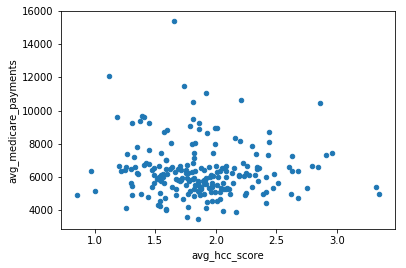

In [38]:
hospitals_df.plot(kind='scatter', x='avg_hcc_score',y='avg_medicare_payments')

In [92]:
hospitals_df.dtypes
#hospitals_df.loc[hospitals_df['hospital_overall_rating'] == 'Not Available','hospital_overall_rating'] = 0

hospital_name                                                object
hospital_type                                                object
hospital_ownership                                           object
hospital_overall_rating                                      object
facility_name                                                object
state                                                        object
total_snf_charge_amount                                       int64
total_snf_medicare_standard_payment_amount                    int64
average_length_of_stays_days                                float64
avg_percent_of_beneficiaries_with_atrial_fibrillation       float64
avg_percent_of_beneficiaries_with_alzheimers                float64
avg_percent_of_beneficiaries_with_asthma                    float64
avg_percent_of_beneficiaries_with_cancer                    float64
avg_percent_of_beneficiaries_with_chf                       float64
avg_percent_of_beneficiaries_with_chronic_kidney

In [132]:
#hospitals_df.loc[hospitals_df['hospital_ownership'] == 'Proprietary']
cms_df.columns

Index(['provider_id', 'facility_name', 'street_address', 'city', 'state',
       'zip_code', 'total_stays', 'distinct_beneficiaries_per_provider',
       'average_length_of_stays_days', 'total_snf_charge_amount',
       'total_snf_medicare_allowed_amount',
       'total_snf_medicare_payment_amount',
       'total_snf_medicare_standard_payment_amount', 'average_age',
       'male_beneficiaries', 'female_beneficiaries', 'nondual_beneficiaries',
       'dual_beneficiaries', 'white_beneficiaries', 'black_beneficiaries',
       'asian_pacific_islander_beneficiaries', 'hispanic_beneficiaries',
       'american_indian_or_alaska_native_beneficiaries',
       'other_unknown_beneficiaries', 'average_hcc_score',
       'percent_of_beneficiaries_with_atrial_fibrillation',
       'percent_of_beneficiaries_with_alzheimers',
       'percent_of_beneficiaries_with_asthma',
       'percent_of_beneficiaries_with_cancer',
       'percent_of_beneficiaries_with_chf',
       'percent_of_beneficiaries_with_ch

In [191]:
cms_df = cms_df.fillna(0)
X = cms_df.drop(['facility_name','street_address', 'city', 'state',
       'zip_code','total_snf_charge_amount','total_snf_medicare_allowed_amount','total_snf_medicare_payment_amount','total_snf_medicare_standard_payment_amount'],axis=1)
# X = cms_df[['']]
Y = cms_df[['total_snf_medicare_standard_payment_amount']]

import math
X_train = X[:math.ceil((80*len(X))/100)]
Y_train = Y[:math.ceil((80*len(Y))/100)]

X_test = X[math.ceil((80*len(X))/100):]
Y_test = Y[math.ceil((80*len(Y))/100):]

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0) 
rf.fit(X_train, Y_train) 
predicted_labels = rf.predict(X_test)

import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

/Users/maitrai.kansal/Documents/Developer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


In [193]:
rf.score(X_test,Y_test)

0.7621290260625297

In [194]:
feature_importances

,importance
total_stays,0.687173
distinct_beneficiaries_per_provider,0.114049
average_length_of_stays_days,0.095969
male_beneficiaries,0.049349
female_beneficiaries,0.024742
white_beneficiaries,0.004950
nondual_beneficiaries,0.004205
percent_of_beneficiaries_with_depression,0.001963
percent_of_beneficiaries_with_copd,0.001828
percent_of_beneficiaries_with_alzheimers,0.001216


In [195]:
Y_test['predictions'] = predicted_labels

/Users/maitrai.kansal/Documents/Developer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [198]:
Y_test.predictions = Y_test.predictions.astype('int64')

/Users/maitrai.kansal/Documents/Developer/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [200]:
Y_test.head()

,total_snf_medicare_standard_payment_amount,predictions
12021,2571317,2584916
12022,2341201,2452619
12023,2921936,2580564
12024,2738176,2572973
12025,2191338,2233372
